<a href="https://colab.research.google.com/github/Storm00212/Electromagnetics/blob/main/Wave_equation_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [ ]:
# Parameters
wavelength = 2.0          # Wavelength λ
k = 2 * np.pi / wavelength  # Wave number β = 2π/λ
omega = 2 * np.pi         # Angular frequency ω (period = 1)
c = omega / k             # Speed c = ω/k (here c = 1 in normalized units)

# Spatial grid along propagation direction (z)
z = np.linspace(-5, 5, 400)

# Animation settings
frames = 200           #200 frames
t_max = 2.0               # Animate over 2 full periods

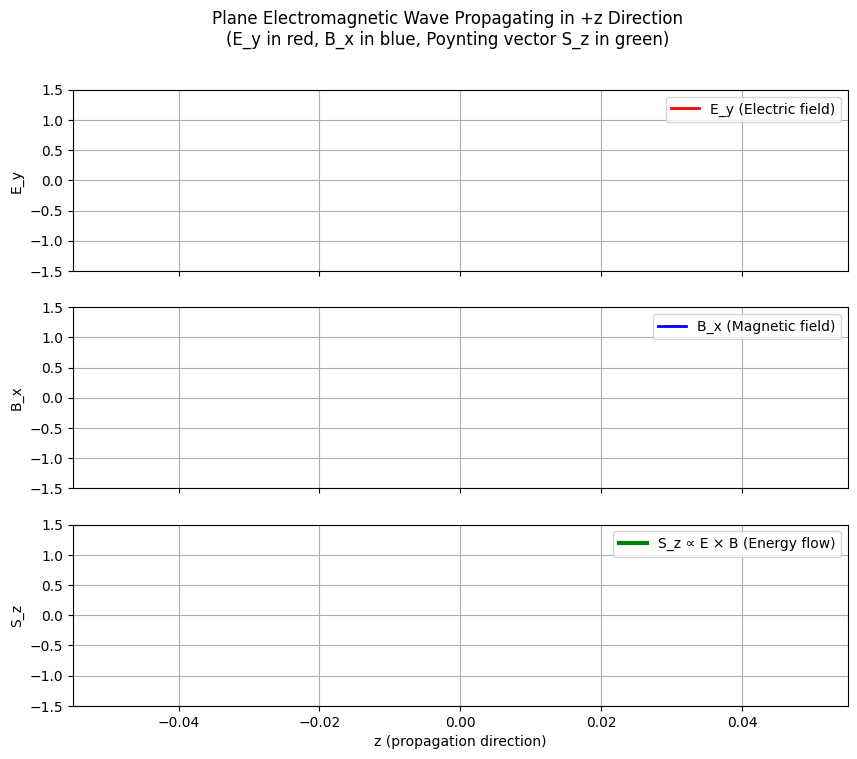

In [ ]:
# Set up the figure
fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
fig.suptitle('Plane Electromagnetic Wave Propagating in +z Direction\n'
             '(E_y in red, B_x in blue, Poynting vector S_z in green)')

# Initialize plot lines
line_E, = ax[0].plot([], [], 'r-', lw=2, label='E_y (Electric field)')
line_B, = ax[1].plot([], [], 'b-', lw=2, label='B_x (Magnetic field)')
line_S, = ax[2].plot([], [], 'g-', lw=3, label='S_z ∝ E × B (Energy flow)')

ax[0].set_ylabel('E_y')
ax[1].set_ylabel('B_x')
ax[2].set_ylabel('S_z')
ax[2].set_xlabel('z (propagation direction)')
for a in ax:
    a.grid(True)
    a.legend(loc='upper right')
    a.set_ylim(-1.5, 1.5)

In [ ]:
# Update function for each frame
def update(frame):
    t = t_max * frame / frames

    # Phase for a wave traveling in +z: ωt - kz
    phase = omega * t - k * z

    # Fields (sinusoidal, in phase)
    E_y = np.sin(phase)
    B_x = (1 / c) * np.sin(phase)   # |B| = |E|/c
    S_z = E_y * B_x                 # Instantaneous Poynting vector component

    line_E.set_data(z, E_y)
    line_B.set_data(z, B_x)
    line_S.set_data(z, S_z)

    ax[0].set_title(f'Time t = {t:.2f}  |  Speed c = {c:.2f}  |  Wavelength λ = {wavelength}')

    return line_E, line_B, line_S

In [ ]:
# Create and display the animation
ani = FuncAnimation(fig, update, frames=frames, interval=50, blit=True)

HTML(ani.to_html5_video())

# Attempting a 3 dimensional view

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

In [ ]:
# Parameters
wavelength = 4.0                  # Wavelength (adjust for more/fewer cycles)
k = 2 * np.pi / wavelength        # Wave number
omega = 2 * np.pi                 # Angular frequency (period = 1 for smooth animation)
c = 1.0                           # Speed of light (normalized units)

# Grid along propagation direction (z-axis)
z = np.linspace(-10, 10, 30)      # 30 points for arrows (more = slower animation)

# Zero arrays for y and x directions (E along y, B along x)
y = np.zeros_like(z)
x = np.zeros_like(z)

# Amplitude scaling for nice arrow sizes
E_amp = 1.5
B_amp = E_amp / c                 # |B| = |E|/c

Text(12, 0, 'c →')

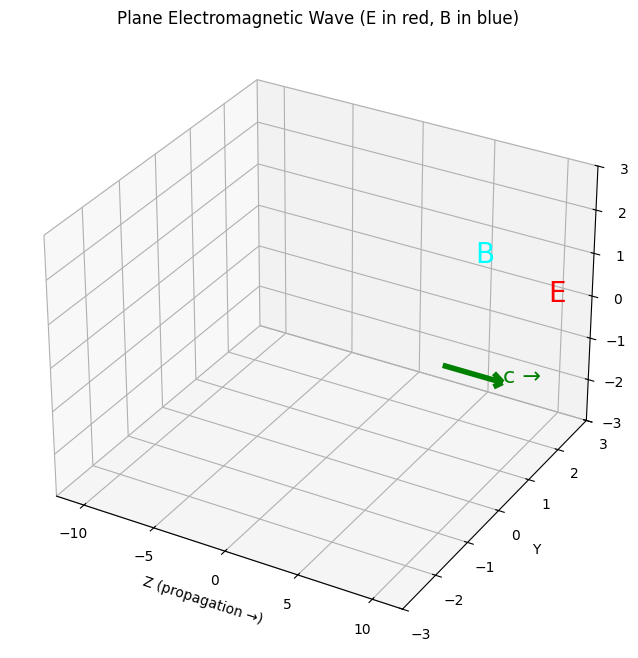

In [ ]:
# Set up the figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-12, 12)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.set_xlabel('Z (propagation →)')
ax.set_ylabel('Y')
ax.set_zlabel('X')
ax.set_title('Plane Electromagnetic Wave (E in red, B in blue)')

# Initial empty quiver objects (will be updated)
quiver_E = ax.quiver([], [], [], [], [], [], color='red',   length=1, arrow_length_ratio=0.3, normalize=True)
quiver_B = ax.quiver([], [], [], [], [], [], color='cyan',  length=1, arrow_length_ratio=0.3, normalize=True)

# Green arrow for propagation direction c
ax.quiver(8, 0, 0, 4, 0, 0, color='green', length=1, arrow_length_ratio=0.15, linewidth=4)

# Labels
ax.text(10, 2.5, 0, 'E', color='red', fontsize=20)
ax.text(10, 0, 2.5, 'B', color='cyan', fontsize=20)
ax.text(12, 0, 0, 'c →', color='green', fontsize=16)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

# Animation update function
def update(frame):
    global quiver_E, quiver_B
    t = frame * 0.05  # Time step for smooth animation

    phase = omega * t - k * z

    # Electric field: along y-direction
    Ey = E_amp * np.sin(phase)
    Ex_E = x.copy()
    Ez_E = y.copy()

    # Magnetic field: along x-direction (in phase with E)
    Bx = B_amp * np.sin(phase)
    Ey_B = y.copy()
    Ez_B = y.copy()

    # Remove old quivers
    quiver_E.remove()
    quiver_B.remove()

    # Plot new E arrows (red)
    quiver_E = ax.quiver(z, y, x, Ez_E, Ey, Ex_E,
                         color='red', length=1, arrow_length_ratio=0.25, normalize=True)

    # Plot new B arrows (cyan/blue)
    quiver_B = ax.quiver(z, y, x, Ez_B, Ey_B, Bx,
                         color='cyan', length=1, arrow_length_ratio=0.25, normalize=True)

    return quiver_E, quiver_B

In [ ]:
# Create animation
ani = FuncAnimation(fig, update, frames=200, interval=50, blit=False)

# Display as HTML5 video in Colab
HTML(ani.to_html5_video())

# Wave Format

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

In [ ]:
# Parameters
wavelength = 6.0                  # Longer wavelength for clearer waves
k = 2 * np.pi / wavelength
omega = 2 * np.pi                 # Frequency
c = 1.0                           # Speed (normalized)

# Dense grid along z for smooth curves
z = np.linspace(-15, 15, 500)     # Many points → smooth sinusoid

# Base positions (fields start at zero in other directions)
x_base = np.zeros_like(z)
y_base = np.zeros_like(z)

# Amplitudes
E_amp = 2.0
B_amp = E_amp / c

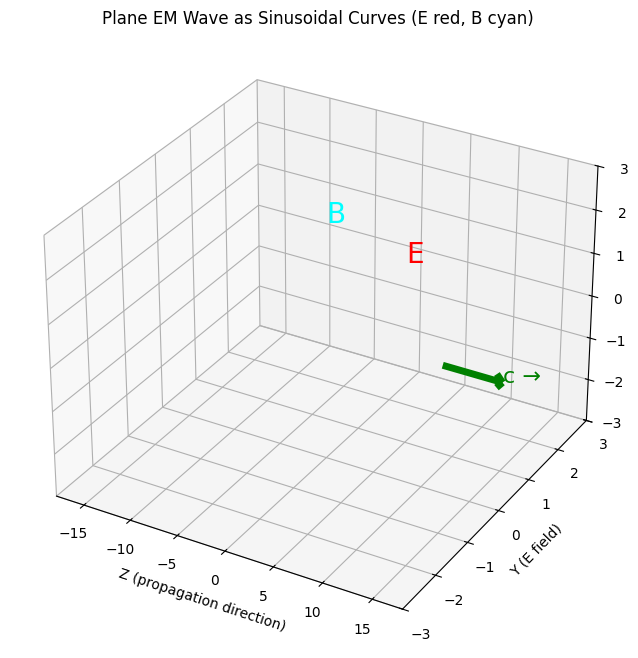

In [ ]:
# Figure setup
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-18, 18)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.set_xlabel('Z (propagation direction)')
ax.set_ylabel('Y (E field)')
ax.set_zlabel('X (B field)')
ax.set_title('Plane EM Wave as Sinusoidal Curves (E red, B cyan)')

# Initial empty line objects
line_E, = ax.plot([], [], [], color='red', lw=4, label='Electric Field E')
line_B, = ax.plot([], [], [], color='cyan', lw=4, label='Magnetic Field B')

# Static green arrow for propagation direction c
ax.quiver(12, 0, 0, 6, 0, 0, color='green', arrow_length_ratio=0.1, linewidth=5)
ax.text(18, 0, 0, 'c →', color='green', fontsize=16)

# Labels near the waves
ax.text(0, 2.5, 0, 'E', color='red', fontsize=20)
ax.text(0, 0, 2.5, 'B', color='cyan', fontsize=20)

# Remove grid and axes for cleaner look (optional)
ax.grid(True)
# ax.set_axis_off()  # Comment this line if you want axes visible

In [ ]:
# Update function
def update(frame):
    t = frame * 0.04  # Smooth time progression

    phase = omega * t - k * z

    # E field: oscillates in y-direction
    Ey = E_amp * np.sin(phase)

    # B field: oscillates in x-direction (in phase)
    Bx = B_amp * np.sin(phase)

    # Update E line: position (z, Ey, 0)
    line_E.set_data_3d(z, Ey, x_base)

    # Update B line: position (z, 0, Bx)
    line_B.set_data_3d(z, y_base, Bx)

    return line_E, line_B

In [ ]:
# Create animation
ani = FuncAnimation(fig, update, frames=250, interval=40, blit=False)

# Display in Colab/Jupyter
HTML(ani.to_html5_video())